In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import warnings
warnings.filterwarnings('ignore')
import pickle

numpy version: 1.17.4
pandas version: 0.25.3
seaborn version: 0.9.0
matplotlib version: 3.1.2
scikit-learn: 0.21.3


In [2]:
from sklearn.model_selection import train_test_split

### import data

In [3]:
!ls

ds_internship_task  internship_task.ipynb  README.md  xgb_grid.pickle


In [4]:
!ls ds_internship_task/

insurance.csv  readme.txt


In [5]:
!cat ds_internship_task/readme.txt

Health Insurance Dataset

Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

* Both code and solution can be a single report file, e.g. .ipynb or .rmd


In [6]:
data = pd.read_csv('ds_internship_task/insurance.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

There are 4 quantitive variables and 3 categorical variables.

quantitive - age, bmi, children, charges. 

charges - target variable

categorical - sex, smoker, region

In [10]:
target = 'charges'

EDA

In [11]:
data[target].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

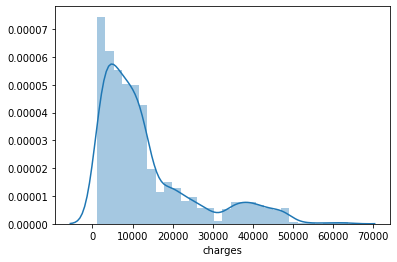

In [12]:
sns.distplot(data[target])

In [13]:
print(f"skewness: {data[target].skew()}")
print(f"kurtosis: {data[target].kurt()}")

skewness: 1.5158796580240388
kurtosis: 1.6062986532967907


In [14]:
print(f"skewness: {np.log(data[target]).skew()}")
print(f"kurtosis: {np.log(data[target]).kurt()}")

skewness: -0.09009752473024583
kurtosis: -0.6366666331104724


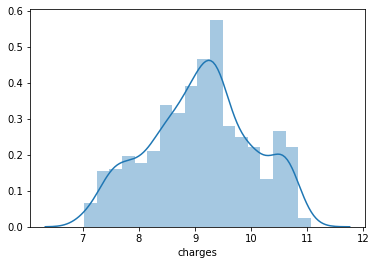

In [15]:
sns.distplot(np.log(data[target]))

In [16]:
def scatter_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    d.plot.scatter(x=var, y=target)

In [17]:
def box_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y=target, data=d)

In [18]:
def descriptive_stats(var, target=target):
    d = pd.DataFrame(index=data.describe().index, columns=np.unique(data[var]))
    for x in np.unique(data[var]):
        d[x] = data[target][data[var] == x].describe()
    return d

In [19]:
def corrmat_plot(n, target=target):
    corrmat = data.corr()
    cols = corrmat.nlargest(n, target)[target].index
    hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, 
                     fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

In [20]:
def count_outliers(var, target=target):
    res = {}
    for x in np.unique(data[var]):
        df = data[target][data[var] == x]
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        res[x] = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return res

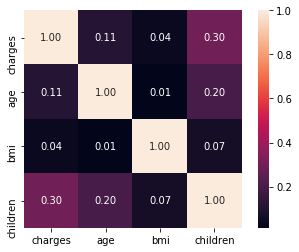

In [21]:
corrmat_plot(len(data))

As we can see data have weak linear relationship.
Children have the biggest impact on changes, then age, then bmi.

quantitive -> quantitive


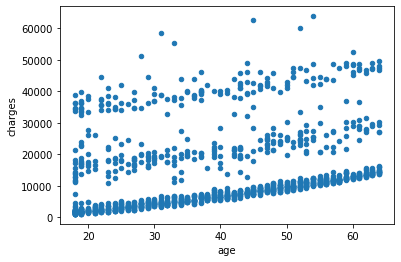

In [22]:
scatter_plot('age')

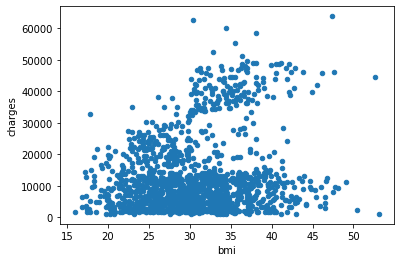

In [23]:
scatter_plot('bmi')

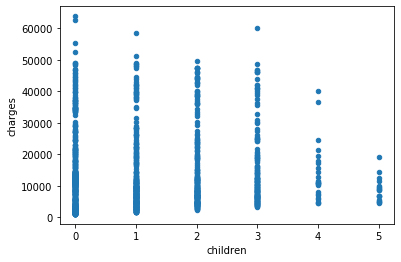

In [24]:
scatter_plot('children')

In [25]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


categorical -> quantitive

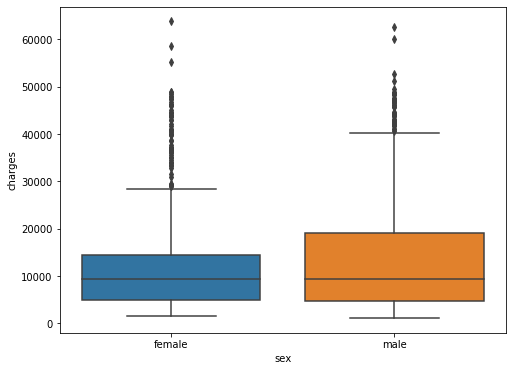

In [26]:
box_plot('sex')

In [27]:
descriptive_stats('sex')

,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


In [28]:
count_outliers('sex')

{'female': 65, 'male': 44}

median's are close to each other. 

min, max, Q1, range are close

male Q3 is larger than female Q3

the largest observation that are not classified as outlier in male's are higher then in female's. 

female's have more outliers

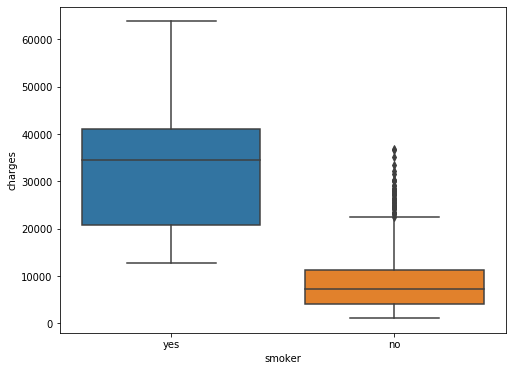

In [29]:
box_plot('smoker')

In [30]:
descriptive_stats('smoker')

,no,yes
count,1064.000000,274.000000
mean,8434.268298,32050.231832
std,5993.781819,11541.547176
min,1121.873900,12829.455100
25%,3986.438700,20826.244213
50%,7345.405300,34456.348450
75%,11362.887050,41019.207275
max,36910.608030,63770.428010


there is huge difference between smokers and non-smokers

every statistic of smokers is higher than non-smokers

there are many outliers in non-smokers

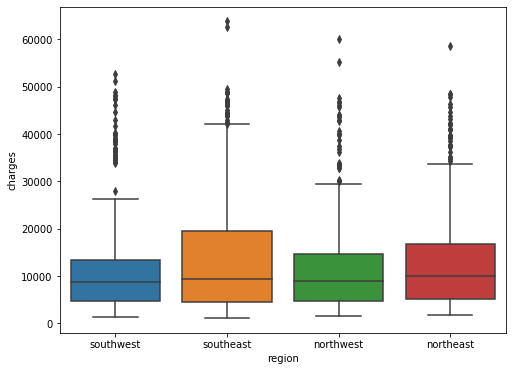

In [31]:
box_plot('region')

In [32]:
descriptive_stats('region')

,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [33]:
count_outliers('region')

{'northeast': 29, 'northwest': 29, 'southeast': 26, 'southwest': 38}

median of regions are close to each other

range of southeast are the highest

southwest have more outliers

As a result we can conclude that smokers have the biggest impact on the target variable

region and sex - not.

categorical variables to numerical

In [34]:
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

Data engineering

In [35]:
data['has_no_child'] = 1
data['has_no_child'].loc[data['children'] > 0] = 0

In [36]:
data['bmi/age'] = data['bmi'] / data['age']

In [37]:
data['children/age'] = data['children'] / data['age']

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges,has_no_child,bmi/age,children/age
0,19,0,27.900,0,1,southwest,16884.92400,1,1.468421,0.000000
1,18,1,33.770,1,0,southeast,1725.55230,0,1.876111,0.055556
2,28,1,33.000,3,0,southeast,4449.46200,0,1.178571,0.107143
3,33,1,22.705,0,0,northwest,21984.47061,1,0.688030,0.000000
4,32,1,28.880,0,0,northwest,3866.85520,1,0.902500,0.000000


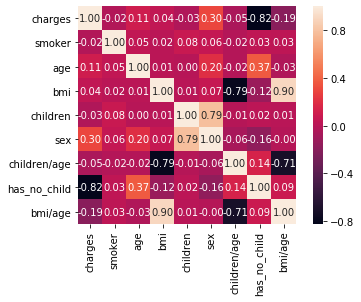

In [39]:
corrmat_plot(len(data))

In [40]:
data['region'] = data['region'].astype('category')
data['region_cat'] = data['region'].cat.codes
data.drop(['region'], inplace=True, axis=1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Depending on the business task, we can choose one of two options

- If we have more interest in large charges, we shouldn't change the target variable
- If we have interest in all charges, we should log tranform the target variable

# 1 pipeline without log transformation

In [42]:
y = data[target]
X = data.drop([target], axis=1)

In [43]:
X.shape, y.shape

((1338, 9), (1338,))

In [44]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=22, test_size=0.2)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=23, test_size=0.2)

In [46]:
X_trainval.shape, X_train.shape, X_val.shape, X_test.shape

((1070, 9), (856, 9), (214, 9), (268, 9))

### normalize the data

In [47]:
scaler = MinMaxScaler().fit(X_trainval)

In [48]:
X_trainval_scaled = scaler.transform(X_trainval)

use the same scaler to the test set to 

In [49]:
X_test_scaled = scaler.transform(X_test)

## Training

Our data is not linear, that why we should use something else than linear models.

In [50]:
from sklearn import linear_model
from sklearn import ensemble
import xgboost
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [51]:
neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

In [52]:
class XGBoostHelper:
    def __init__(self, xgboost_params, datasets, early_stopping_rounds=None, model=None):
        self.xgboost_params = xgboost_params
        self.model = model
        if len(datasets) == 3:
            # train/val/test split
            self.train_data, self.val_data, self.test_data = datasets
        elif len(datasets) == 2:
            # train/test split
            self.train_data, self.test_data = datasets
            self.val_data = None
        else:
            raise Exception('datasets should be list with length 2 or 3')
        self.early_stopping_rounds = early_stopping_rounds
    
    def train(self):
        eval_params = {'eval_metric': ['rmse'],
                       'eval_set': [self.train_data, self.val_data],
                       'early_stopping_rounds': self.early_stopping_rounds} if self.val_data is not None else {}
        self.model = xgboost.XGBRegressor(**self.xgboost_params).fit(self.train_data[0],
                                                                     self.train_data[1],
                                                                     **eval_params)
        if self.val_data is not None:
            self.results_ = self.model.evals_result()
        self.evals()

        
    def evals(self):
        print("with params:")
        [print(f"{x:<25} - {self.xgboost_params[x]}") for x in self.xgboost_params]
        
        print(f"xgboost train set r2-score {self.model.score(self.train_data[0], self.train_data[1])}")
        if self.val_data is not None:
            print(f"xgboost val set r2-score {self.model.score(self.val_data[0], self.val_data[1])}")
        print(f"xgboost test set r2-score {self.model.score(self.test_data[0], self.test_data[1])}")
        
        print(f"xgboost train set rmse {np.sqrt(mean_squared_error(self.train_data[1], self.model.predict(self.train_data[0])))}")
        if self.val_data is not None:
            print(f"xgboost val set rmse {np.sqrt(mean_squared_error(self.val_data[1], self.model.predict(self.val_data[0])))}")
        print(f"xgboost test set rmse {np.sqrt(mean_squared_error(self.test_data[1], self.model.predict(self.test_data[0])))}")
        

In [53]:
xgboost_params = {
                #'gamma':0,                 
                'learning_rate':0.03,
                #'max_depth':10,
                #'min_child_weight':1,
                'n_estimators':1000,                                                                    
                #'reg_alpha':2,
                #'reg_lambda':1,
                #'subsample':0.7,
                'objective':'reg:squarederror'
                }

In xgboost we shouldn't use scaled data.

In [54]:
xgboost_helper = XGBoostHelper(xgboost_params,
                               datasets=((X_train, y_train), (X_val, y_val), (X_test, y_test)),
                               early_stopping_rounds=10)
xgboost_helper.train()

[0]	validation_0-rmse:17245.3	validation_1-rmse:18148.5
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:16771.3	validation_1-rmse:17660.3
[2]	validation_0-rmse:16312.3	validation_1-rmse:17187.6
[3]	validation_0-rmse:15867.4	validation_1-rmse:16727
[4]	validation_0-rmse:15436.8	validation_1-rmse:16284.1
[5]	validation_0-rmse:15019.5	validation_1-rmse:15851.2
[6]	validation_0-rmse:14615.6	validation_1-rmse:15434.2
[7]	validation_0-rmse:14224.7	validation_1-rmse:15030.6
[8]	validation_0-rmse:13846.1	validation_1-rmse:14640.8
[9]	validation_0-rmse:13479.9	validation_1-rmse:14264.3
[10]	validation_0-rmse:13125.3	validation_1-rmse:13898.4
[11]	validation_0-rmse:12782.3	validation_1-rmse:13546.7
[12]	validation_0-rmse:12450.5	validation_1-rmse:13204.5
[13]	validation_0-rmse:12129.6	validation_1-rmse:12874.3
[14]	validation_0-rmse:11819.2	validation_1-rmse:12555.

[141]	validation_0-rmse:3957.83	validation_1-rmse:4726.33
[142]	validation_0-rmse:3953.31	validation_1-rmse:4726.38
[143]	validation_0-rmse:3951.22	validation_1-rmse:4725.7
[144]	validation_0-rmse:3945.98	validation_1-rmse:4723.5
[145]	validation_0-rmse:3943.65	validation_1-rmse:4723
[146]	validation_0-rmse:3938.67	validation_1-rmse:4721.58
[147]	validation_0-rmse:3936.45	validation_1-rmse:4721.28
[148]	validation_0-rmse:3933.2	validation_1-rmse:4717.45
[149]	validation_0-rmse:3930.25	validation_1-rmse:4715.69
[150]	validation_0-rmse:3928.39	validation_1-rmse:4715.19
[151]	validation_0-rmse:3925.43	validation_1-rmse:4715.56
[152]	validation_0-rmse:3921.76	validation_1-rmse:4713.23
[153]	validation_0-rmse:3917.64	validation_1-rmse:4714.14
[154]	validation_0-rmse:3915.16	validation_1-rmse:4714.41
[155]	validation_0-rmse:3912.23	validation_1-rmse:4710.55
[156]	validation_0-rmse:3910.53	validation_1-rmse:4710.21
[157]	validation_0-rmse:3907.78	validation_1-rmse:4710.63
[158]	validation_0-r

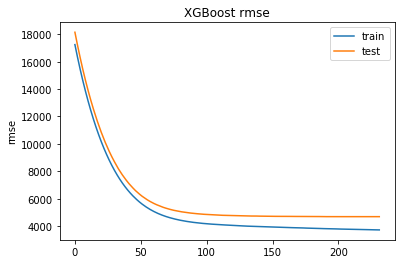

In [55]:
results = xgboost_helper.results_
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

Now our model is overfitting. So we need to generalize model.

We can 
 - decrease 
     * learning_rate
     * max_depth
 - increase 
     * reg_alpha
     * reg_lambda

In [56]:
xgboost_params = {
                #'gamma':0,                 
                'learning_rate':0.1,
                'max_depth':3,
                'min_child_weight':2,
                'n_estimators':1000,                                                                    
                #'reg_alpha':5,
                #'reg_lambda':10,
                'subsample':0.9,
                'subsample_bycol':0.9,
                'objective':'reg:squarederror'
                }
xgboost_helper = XGBoostHelper(xgboost_params,
                               datasets=((X_train, y_train), (X_val, y_val), (X_test, y_test)),
                               early_stopping_rounds=10)
xgboost_helper.train()

[0]	validation_0-rmse:16115.8	validation_1-rmse:16972.3
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:14653.9	validation_1-rmse:15460.5
[2]	validation_0-rmse:13363.6	validation_1-rmse:14124.4
[3]	validation_0-rmse:12208.2	validation_1-rmse:12931.3
[4]	validation_0-rmse:11177	validation_1-rmse:11870.9
[5]	validation_0-rmse:10253	validation_1-rmse:10925.6
[6]	validation_0-rmse:9443.65	validation_1-rmse:10083.4
[7]	validation_0-rmse:8723.69	validation_1-rmse:9342.66
[8]	validation_0-rmse:8084.97	validation_1-rmse:8675.36
[9]	validation_0-rmse:7524.22	validation_1-rmse:8110.67
[10]	validation_0-rmse:7033.71	validation_1-rmse:7610.97
[11]	validation_0-rmse:6606.34	validation_1-rmse:7177
[12]	validation_0-rmse:6235.22	validation_1-rmse:6800.56
[13]	validation_0-rmse:5911.66	validation_1-rmse:6495.51
[14]	validation_0-rmse:5632.93	validation_1-rmse:6212.94
[15

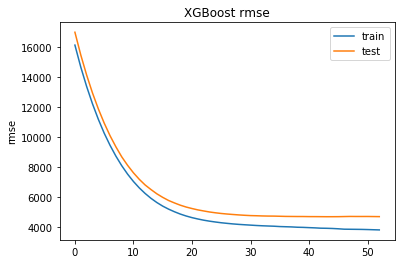

In [57]:
results = xgboost_helper.results_
len(results)
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

Instead of trying to choose right hyperparams on train/val split manually we can automate this process using grid search with CV on 5 folds. this is very robust approach

In [60]:
xgboost_params = {
                'gamma': [0, 0.1, 1],
                'lambda': [1., 2.],
                'alpha': [0, 1.],
                'learning_rate': [0.1, 0.3],
                'max_depth': [3, 4, 5],
                'min_child_weight':[1, 2, 3],
                'n_estimators':[30, 45, 60, 75],                                                                    
                'silent': [1],
                'subsample': [0.8, 0.9, 1.0],
                'subsample_bycol': [0.8, 0.9, 1.0],
                'objective':['reg:squarederror'],
                 }

In [61]:
# grid search with CV from sklearn makes usage of early_stopping on folds quite hard. So instead of it we carefully
# hardcoded different n_estimators
# grid search also take argmax by score, but we need minimum, so we should take negative mse
xgb_grid = GridSearchCV(xgboost.XGBRegressor(), 
                    param_grid=xgboost_params, 
                    scoring=neg_mse, 
                    n_jobs=-1,
                    cv=None,
                    verbose=True)

xgb_grid.fit(X_trainval, y_trainval)
print(f"best_params: {xgb_grid.best_params_}\nbest_score: {xgb_grid.best_score_}")

pickle.dump(xgb_grid.best_estimator_, open("xgb_grid.pickle", "wb"))

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 3784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 5984 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 8584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 11584 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 14984 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 18784 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 22984 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 23328 out of 23328 | elapsed: 10.3min finished


best_params: {'alpha': 0, 'gamma': 0, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 60, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.8, 'subsample_bycol': 0.8}
best_score: -20032609.018613853


In [62]:
xgboost_helper = XGBoostHelper(xgb_grid.best_params_,
                               datasets=((X_trainval, y_trainval), (X_test, y_test)),
                               model=xgb_grid.best_estimator_)
xgboost_helper.evals()

with params:
alpha                     - 0
gamma                     - 0
lambda                    - 1.0
learning_rate             - 0.1
max_depth                 - 3
min_child_weight          - 3
n_estimators              - 60
objective                 - reg:squarederror
silent                    - 1
subsample                 - 0.8
subsample_bycol           - 0.8
xgboost train set r2-score 0.8955649503872906
xgboost test set r2-score 0.8406620461898394
xgboost train set rmse 3909.9462320683674
xgboost test set rmse 4841.8495412706925


As we can see with grid search we evaluate our model on 0.005, but it takes some time. 

This approach is time consuming but we can get better results.

To compare we will try linear regrassion, ridge and lasso models.

In [65]:
lr = linear_model.LinearRegression().fit(X_trainval_scaled, y_trainval)

In [66]:
lr_test_score = lr.score(X_test_scaled, y_test)

In [67]:
print(f"lr train R2 is {lr.score(X_trainval_scaled, y_trainval)}\nRMSE is {np.sqrt(mean_squared_error(y_trainval, lr.predict(X_trainval_scaled)))}")
print(f"lr test set score {lr_test_score}\nRMSE is {np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled)))}")

lr train R2 is 0.7504940296509266
RMSE is 6043.4943106125465
lr test set score 0.7595504507785396
RMSE is 5947.899962333636


In [68]:
print(f"lr.coef_:{lr.coef_}")
print(f"lr.intercept_:{lr.intercept_}")

lr.coef_:[16696.94153222  -209.39520783  8658.11029201  -298.69541631
 23536.59474439  -402.6555905   9268.97578648  4666.77757611
  -802.33101917]
lr.intercept_:-4606.292120373708


In [69]:
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
best_ridge_model = None
best_ridge_score = 0
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_trainval_scaled, y_trainval)
    pred_ridge = ridge.predict(X_test_scaled)
    
    score = ridge.score(X_test_scaled, y_test)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_model = ridge
    print(f'alpha={alpha}\nR^2 train is: {ridge.score(X_trainval_scaled, y_trainval)}\nRMSE train is {np.sqrt(mean_squared_error(y_trainval, ridge.predict(X_trainval_scaled)))}\nR^2 test is: {score}\nRMSE test is {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))}')
    print('-' * 30)
print(f'best_alpha is {best_ridge_model.alpha}, best_test_score is {best_ridge_score}, RMSE best test is {np.sqrt(mean_squared_error(y_test, best_ridge_model.predict(X_test_scaled)))}')

alpha=0.0001
R^2 train is: 0.7504940296455364
RMSE train is 6043.494310677826
R^2 test is: 0.7595504895630801
RMSE test is 5947.899482635135
------------------------------
alpha=0.0003
R^2 train is: 0.7504940296024241
RMSE train is 6043.4943111999555
R^2 test is: 0.7595505670824008
RMSE test is 5947.89852385347
------------------------------
alpha=0.001
R^2 train is: 0.7504940291123591
RMSE train is 6043.494317135095
R^2 test is: 0.759550837877992
RMSE test is 5947.895174573059
------------------------------
alpha=0.003
R^2 train is: 0.7504940248127755
RMSE train is 6043.494369207012
R^2 test is: 0.7595516071162618
RMSE test is 5947.885660395068
------------------------------
alpha=0.01
R^2 train is: 0.7504939762395162
RMSE train is 6043.494957473897
R^2 test is: 0.7595542478082622
RMSE test is 5947.852999379916
------------------------------
alpha=0.03
R^2 train is: 0.750493557654953
RMSE train is 6043.5000269159045
R^2 test is: 0.7595613608046001
RMSE test is 5947.765022426465
------

In [71]:
best_lasso_model = None
best_lasso_score = 0
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_trainval_scaled, y_trainval)
    pred_lasso = lasso.predict(X_test_scaled)
    tmp_mean = mean_squared_error(y_test, pred_ridge)
    score = lasso.score(X_test_scaled, y_test)
    if score > best_lasso_score:
        best_lasso_score = score
        best_lasso_model = lasso
    print(f'alpha={alpha}\nR^2 train is: {lasso.score(X_trainval_scaled, y_trainval)}\nRMSE train is {np.sqrt(mean_squared_error(y_trainval, lasso.predict(X_trainval_scaled)))}\nR^2 test is: {score}\nRMSE test is {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))}')
    print('-' * 30)
print(f'best_alpha is {best_lasso_model.alpha}, best_test_score is {best_lasso_score}, RMSE best test is {np.sqrt(mean_squared_error(y_test, best_lasso_model.predict(X_test_scaled)))}')

alpha=0.0001
R^2 train is: 0.7504940296508179
RMSE train is 6043.494310613863
R^2 test is: 0.7595504556696585
RMSE test is 5947.899901838854
------------------------------
alpha=0.0003
R^2 train is: 0.7504940296499483
RMSE train is 6043.494310624394
R^2 test is: 0.7595504654686156
RMSE test is 5947.899780642499
------------------------------
alpha=0.001
R^2 train is: 0.7504940296400633
RMSE train is 6043.494310744111
R^2 test is: 0.7595504997001843
RMSE test is 5947.8993572564705
------------------------------
alpha=0.003
R^2 train is: 0.7504940295532073
RMSE train is 6043.4943117960165
R^2 test is: 0.7595505973622467
RMSE test is 5947.898149343422
------------------------------
alpha=0.01
R^2 train is: 0.7504940285641846
RMSE train is 6043.494323773992
R^2 test is: 0.7595509390912927
RMSE test is 5947.893922736369
------------------------------
alpha=0.03
R^2 train is: 0.7504940198750766
RMSE train is 6043.494429007094
R^2 test is: 0.7595519070187249
RMSE test is 5947.881951104076
---

both regularization models show the best performance with low alpha 

as you might expect linear models performed worse than xgboost

In [72]:
best_scores = {"no_reg": lr_test_score, "ridge": best_ridge_score, "lasso": best_lasso_score,}

In [73]:
max(best_scores)

'ridge'

In [74]:
for x in best_scores:
    print(best_scores[x])

0.7595504507785396
0.7595816101663513
0.7595552122143508


In [75]:
max(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

23536.594744391252

In [76]:
min(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

-802.3310191702506

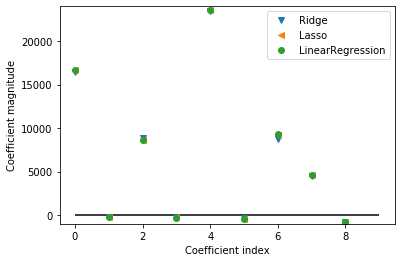

In [77]:
plt.plot(best_ridge_model.coef_, 'v', label="Ridge")
plt.plot(best_lasso_model.coef_, '<', label="Lasso")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(best_ridge_model.coef_))
plt.ylim(-1000, 24000)
plt.legend()
plt.show()

Here all parameters are the same because of low regularization parameter on lasso and ridge.

# 2 pipeline, with log transformation

In [78]:
y_trainval = np.log(y_trainval)
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

In [79]:
xgboost_params = {
                #'gamma':0,                 
                'learning_rate':0.03,
                #'max_depth':10,
                #'min_child_weight':1,
                'n_estimators':1000,                                                                    
                #'reg_alpha':2,
                #'reg_lambda':1,
                #'subsample':0.7,
                'objective':'reg:squarederror'
                }

In xgboost we shouldn't use scaled data.

In [80]:
xgboost_helper = XGBoostHelper(xgboost_params,
                               datasets=((X_train, y_train), (X_val, y_val), (X_test, y_test)),
                               early_stopping_rounds=10)
xgboost_helper.train()

[0]	validation_0-rmse:8.38428	validation_1-rmse:8.39878
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:8.13456	validation_1-rmse:8.14952
[2]	validation_0-rmse:7.89235	validation_1-rmse:7.90775
[3]	validation_0-rmse:7.65739	validation_1-rmse:7.67311
[4]	validation_0-rmse:7.42948	validation_1-rmse:7.44563
[5]	validation_0-rmse:7.20841	validation_1-rmse:7.22487
[6]	validation_0-rmse:6.99397	validation_1-rmse:7.01066
[7]	validation_0-rmse:6.78596	validation_1-rmse:6.80296
[8]	validation_0-rmse:6.5842	validation_1-rmse:6.60141
[9]	validation_0-rmse:6.38848	validation_1-rmse:6.40574
[10]	validation_0-rmse:6.1986	validation_1-rmse:6.21591
[11]	validation_0-rmse:6.01444	validation_1-rmse:6.03215
[12]	validation_0-rmse:5.83582	validation_1-rmse:5.85388
[13]	validation_0-rmse:5.66252	validation_1-rmse:5.68063
[14]	validation_0-rmse:5.49443	validation_1-rmse:5.5125

[139]	validation_0-rmse:0.363304	validation_1-rmse:0.405434
[140]	validation_0-rmse:0.361735	validation_1-rmse:0.404139
[141]	validation_0-rmse:0.360309	validation_1-rmse:0.40298
[142]	validation_0-rmse:0.358805	validation_1-rmse:0.401684
[143]	validation_0-rmse:0.357418	validation_1-rmse:0.400551
[144]	validation_0-rmse:0.356128	validation_1-rmse:0.399418
[145]	validation_0-rmse:0.354956	validation_1-rmse:0.3985
[146]	validation_0-rmse:0.353637	validation_1-rmse:0.397517
[147]	validation_0-rmse:0.352537	validation_1-rmse:0.396477
[148]	validation_0-rmse:0.351367	validation_1-rmse:0.395656
[149]	validation_0-rmse:0.350286	validation_1-rmse:0.394787
[150]	validation_0-rmse:0.349366	validation_1-rmse:0.394127
[151]	validation_0-rmse:0.348346	validation_1-rmse:0.393274
[152]	validation_0-rmse:0.34736	validation_1-rmse:0.392618
[153]	validation_0-rmse:0.346372	validation_1-rmse:0.391936
[154]	validation_0-rmse:0.345457	validation_1-rmse:0.391056
[155]	validation_0-rmse:0.344556	validation_

with params:
learning_rate             - 0.03
n_estimators              - 1000
objective                 - reg:squarederror
xgboost train set r2-score 0.8876633214586827
xgboost val set r2-score 0.8364691738574381
xgboost test set r2-score 0.8008679322814961
xgboost train set rmse 0.3059803853738259
xgboost val set rmse 0.37694091076527664
xgboost test set rmse 0.4143474095677172


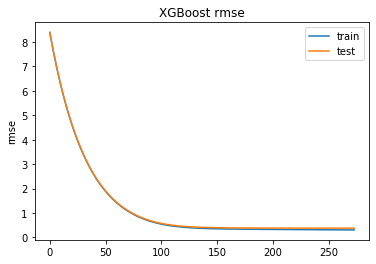

In [81]:
results = xgboost_helper.results_
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

In [82]:
xgboost_params = {
                #'gamma':0,                 
                'learning_rate':0.1,
                'max_depth':3,
                'min_child_weight':2,
                'n_estimators':1000,                                                                    
                #'reg_alpha':5,
                #'reg_lambda':10,
                'subsample':0.9,
                'subsample_bycol':0.9,
                'objective':'reg:squarederror'
                }
xgboost_helper = XGBoostHelper(xgboost_params,
                               datasets=((X_train, y_train), (X_val, y_val), (X_test, y_test)),
                               early_stopping_rounds=10)
xgboost_helper.train()

[0]	validation_0-rmse:7.78496	validation_1-rmse:7.80028
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.01286	validation_1-rmse:7.02964
[2]	validation_0-rmse:6.3176	validation_1-rmse:6.33513
[3]	validation_0-rmse:5.69246	validation_1-rmse:5.711
[4]	validation_0-rmse:5.12981	validation_1-rmse:5.14853
[5]	validation_0-rmse:4.62355	validation_1-rmse:4.64297
[6]	validation_0-rmse:4.16791	validation_1-rmse:4.18952
[7]	validation_0-rmse:3.75805	validation_1-rmse:3.78056
[8]	validation_0-rmse:3.38946	validation_1-rmse:3.4129
[9]	validation_0-rmse:3.05669	validation_1-rmse:3.07839
[10]	validation_0-rmse:2.75788	validation_1-rmse:2.78016
[11]	validation_0-rmse:2.4891	validation_1-rmse:2.5099
[12]	validation_0-rmse:2.24836	validation_1-rmse:2.26926
[13]	validation_0-rmse:2.03209	validation_1-rmse:2.05468
[14]	validation_0-rmse:1.83798	validation_1-rmse:1.86213
[1

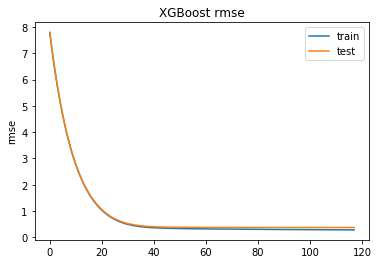

In [83]:
results = xgboost_helper.results_
len(results)
fig, ax = plt.subplots()
ax.plot(results['validation_0']['rmse'], label='train')
ax.plot(results['validation_1']['rmse'], label='test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

In [84]:
xgboost_params = {
                'gamma': [0, 0.1, 1],
                'lambda': [1., 2.],
                'alpha': [0, 1.],
                'learning_rate': [0.1, 0.3],
                'max_depth': [3, 4, 5],
                'min_child_weight':[1, 2, 3],
                'n_estimators':[30, 45, 60, 75],                                                                    
                'silent': [1],
                'subsample': [0.8, 0.9, 1.0],
                'subsample_bycol': [0.8, 0.9, 1.0],
                'objective':['reg:squarederror'],
                 }

In [85]:
# grid search with CV from sklearn makes usage of early_stopping on folds quite hard. So instead of it we carefully
# hardcoded different n_estimators
# grid search also take argmax by score, but we need minimum, so we should take negative mse
xgb_grid = GridSearchCV(xgboost.XGBRegressor(), 
                    param_grid=xgboost_params, 
                    scoring=neg_mse, 
                    n_jobs=-1,
                    cv=None,
                    verbose=True)

xgb_grid.fit(X_trainval, y_trainval)
print(f"best_params: {xgb_grid.best_params_}\nbest_score: {xgb_grid.best_score_}")

pickle.dump(xgb_grid.best_estimator_, open("xgb_grid.pickle", "wb"))

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9560 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 12560 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 15960 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 19760 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 23328 out of 23328 | elapsed:  6.3min finished


best_params: {'alpha': 0, 'gamma': 0.1, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 60, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.8, 'subsample_bycol': 0.8}
best_score: -0.14006218143532886


In [86]:
xgboost_helper = XGBoostHelper(xgb_grid.best_params_,
                               datasets=((X_trainval, y_trainval), (X_test, y_test)),
                               model=xgb_grid.best_estimator_)
xgboost_helper.evals()

with params:
alpha                     - 0
gamma                     - 0.1
lambda                    - 1.0
learning_rate             - 0.1
max_depth                 - 3
min_child_weight          - 3
n_estimators              - 60
objective                 - reg:squarederror
silent                    - 1
subsample                 - 0.8
subsample_bycol           - 0.8
xgboost train set r2-score 0.8725774782125449
xgboost test set r2-score 0.8080297868008393
xgboost train set rmse 0.3272657261013888
xgboost test set rmse 0.4068281070948513


As we can see with grid search we evaluate our model on 0.008, but it takes some time. 

This approach is time consuming but we can get better results.

To compare we will try linear regrassion, ridge and lasso models.

In [87]:
lr = linear_model.LinearRegression().fit(X_trainval_scaled, y_trainval)

In [88]:
lr_test_score = lr.score(X_test_scaled, y_test)

In [89]:
print(f"lr train R2 is {lr.score(X_trainval_scaled, y_trainval)}\nRMSE is {np.sqrt(mean_squared_error(y_trainval, lr.predict(X_trainval_scaled)))}")
print(f"lr test set score {lr_test_score}\nRMSE is {np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled)))}")

lr train R2 is 0.7779148429918334
RMSE is 0.4320531678313562
lr test set score 0.7597976777335999
RMSE is 0.4550746327696471


In [90]:
print(f"lr.coef_:{lr.coef_}")
print(f"lr.intercept_:{lr.intercept_}")

lr.coef_:[ 1.46072264 -0.0697564   0.77006578 -0.36571623  1.5449334  -0.06531283
 -0.64946731  1.3621052  -0.12645442]
lr.intercept_:7.997428940185431


In [91]:
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
best_ridge_model = None
best_ridge_score = 0
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_trainval_scaled, y_trainval)
    pred_ridge = ridge.predict(X_test_scaled)
    
    score = ridge.score(X_test_scaled, y_test)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_model = ridge
    print(f'alpha={alpha}\nR^2 train is: {ridge.score(X_trainval_scaled, y_trainval)}\nRMSE train is {np.sqrt(mean_squared_error(y_trainval, ridge.predict(X_trainval_scaled)))}\nR^2 test is: {score}\nRMSE test is {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))}')
    print('-' * 30)
print(f'best_alpha is {best_ridge_model.alpha}, best_test_score is {best_ridge_score}, RMSE best test is {np.sqrt(mean_squared_error(y_test, best_ridge_model.predict(X_test_scaled)))}')

alpha=0.0001
R^2 train is: 0.7779148429778988
RMSE train is 0.4320531678449107
R^2 test is: 0.7597976430193026
RMSE test is 0.4550746656535829
------------------------------
alpha=0.0003
R^2 train is: 0.7779148428664466
RMSE train is 0.43205316795332244
R^2 test is: 0.7597975735174576
RMSE test is 0.45507473149083577
------------------------------
alpha=0.001
R^2 train is: 0.7779148415996061
RMSE train is 0.43205316918560305
R^2 test is: 0.7597973294926915
RMSE test is 0.45507496264894326
------------------------------
alpha=0.003
R^2 train is: 0.7779148304864218
RMSE train is 0.43205317999561493
R^2 test is: 0.7597966257140163
RMSE test is 0.45507562931892476
------------------------------
alpha=0.01
R^2 train is: 0.7779147049941946
RMSE train is 0.4320533020643428
R^2 test is: 0.7597940866875444
RMSE test is 0.4550780344600257
------------------------------
alpha=0.03
R^2 train is: 0.7779136249750909
RMSE train is 0.43205435261848396
R^2 test is: 0.7597862024086006
RMSE test is 0.455

In [92]:
best_lasso_model = None
best_lasso_score = 0
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_trainval_scaled, y_trainval)
    pred_lasso = lasso.predict(X_test_scaled)
    tmp_mean = mean_squared_error(y_test, pred_ridge)
    score = lasso.score(X_test_scaled, y_test)
    if score > best_lasso_score:
        best_lasso_score = score
        best_lasso_model = lasso
    print(f'alpha={alpha}\nR^2 train is: {lasso.score(X_trainval_scaled, y_trainval)}\nRMSE train is {np.sqrt(mean_squared_error(y_trainval, lasso.predict(X_trainval_scaled)))}\nR^2 test is: {score}\nRMSE test is {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))}')
    print('-' * 30)
print(f'best_alpha is {best_lasso_model.alpha}, best_test_score is {best_lasso_score}, RMSE best test is {np.sqrt(mean_squared_error(y_test, best_lasso_model.predict(X_test_scaled)))}')

alpha=0.0001
R^2 train is: 0.7778932904402834
RMSE train is 0.4320741319119554
R^2 test is: 0.7597036359838307
RMSE test is 0.4551637073181029
------------------------------
alpha=0.0003
R^2 train is: 0.7777227278174397
RMSE train is 0.4322400016294339
R^2 test is: 0.7593870833052825
RMSE test is 0.4554634119573683
------------------------------
alpha=0.001
R^2 train is: 0.7762193858498883
RMSE train is 0.433699236556961
R^2 test is: 0.7573512564768201
RMSE test is 0.4573861922156692
------------------------------
alpha=0.003
R^2 train is: 0.7741513268268131
RMSE train is 0.43569863436251166
R^2 test is: 0.754515087182716
RMSE test is 0.460051477095834
------------------------------
alpha=0.01
R^2 train is: 0.7607372987595586
RMSE train is 0.448450928694436
R^2 test is: 0.7399548433644432
RMSE test is 0.4734982858213068
------------------------------
alpha=0.03
R^2 train is: 0.7365722132773428
RMSE train is 0.4705526444728092
R^2 test is: 0.7174369708306573
RMSE test is 0.4935733419021

In [93]:
best_scores = {"no_reg": lr_test_score, "ridge": best_ridge_score, "lasso": best_lasso_score,}

In [94]:
max(best_scores)

'ridge'

In [95]:
for x in best_scores:
    print(best_scores[x])

0.7597976777335999
0.7597976430193026
0.7597036359838307


In [96]:
max(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

1.5449334013475393

In [97]:
min(*best_lasso_model.coef_, *best_ridge_model.coef_, *lr.coef_)

-0.6494673073021656

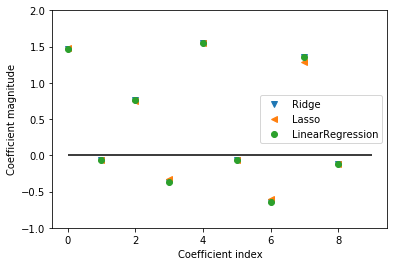

In [99]:
plt.plot(best_ridge_model.coef_, 'v', label="Ridge")
plt.plot(best_lasso_model.coef_, '<', label="Lasso")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(best_ridge_model.coef_))
plt.ylim(-1, 2)
plt.legend()
plt.show()